In [1]:
# imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Obtain

In [3]:
# This step involves understanding stakeholder requirements, gathering information on the pro\blem, 
# and finally sourcing data that we think will be necessary for solving this problem

In [4]:
# Obtained two csv files for target variable and features. Merged the dataframes. 

In [5]:
target_df = pd.read_csv("training_set_labels.csv")
features_df = pd.read_csv("training_set_values.csv")
df = pd.merge(target_df, features_df, on="id")
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
# View dataframe statistics
# There are only 9 numerical columns. In light of this information, will make a vanilla model with only numerical 
# columns then add in categorical columns to see if that improves the results
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
# 40 variables that appear to be mostly string datatypes. A lot of the columns look like they could have similar information, 
# such as the three columns, "extraction_type", "extraction_type_group", and "extraction_type_class". They all have the same
# description as well, "The kind of extraction the waterpoint uses". Will look at getting rid of columns that are non needed 
# or that are redundant. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [8]:
# Using a bar chart to view the distribution of the target variable, "status_group". By there being three potential outcomes,
# this graph show that this is a multiclass classification problem that is imbalanced

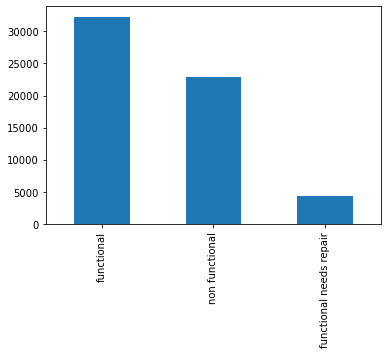

In [9]:
df['status_group'].value_counts().plot(kind='bar')
plt.show()

In [10]:
# The percentage of "functional needs repair" is very low compared to the other two options. Since
# there are so few, I'm going to drop those values from the status_group column in order to solve the class
# imbalance problem
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [11]:
# Dropping "functional needs repair"
df = df[df.status_group != "functional needs repair"]

In [12]:
# Confirming the drop
df['status_group'].value_counts(normalize=True)

functional        0.585643
non functional    0.414357
Name: status_group, dtype: float64

# Scrub

# Explore

In [13]:
# For the first vanilla model, I'll use just the numerical columns from the dataset

In [14]:
# numerical columns
numerical_columns = df.select_dtypes("number")
numerical_columns

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [15]:
# Next step after trying the vanilla decision tree model and the random forest model, 
# use the models to decide on feature importance for the next categorical feature
# Based off the two models, the features that were most important were geographical, so
# my next categorical feature will be on that is geographical. In the dataset, there are a few
# that fit that description, "basin", "subvillage", "region", "lga", "ward". I'll take a look at
# the content of each column to make my decision for the next feature

In [16]:
# numerical columns
cat_columns = df.select_dtypes("object")
cat_columns

,status_group,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,functional,3/14/2011,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,functional,3/6/2013,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,functional,2/25/2013,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,non functional,1/28/2013,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,functional,7/13/2011,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,5/3/2013,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,functional,5/7/2011,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,functional,4/11/2011,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,functional,3/8/2011,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [17]:
df["num_private"].value_counts().nunique()

25

In [18]:
df["water_quality"].nunique()

8

In [19]:
df["basin"].value_counts().nunique()

9

In [20]:
df["subvillage"].value_counts().nunique()

91

In [21]:
df["region"].value_counts().nunique()

21

In [22]:
df["region"].isnull().sum()

0

In [23]:
df["lga"].value_counts().nunique()

117

In [24]:
df["ward"].value_counts().nunique()

134

In [25]:
# Based of the number of unique values per column, my second categorical choice for a column
# will be "basin"

In [26]:
# Check for missing values
df["basin"].isnull().sum()

0

In [27]:
# add "basin" column
df_basin = pd.concat([numerical_columns, df['basin']], axis=1)
df_basin.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,Lake Nyasa
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,Lake Victoria
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,Pangani
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,Ruvuma / Southern Coast
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,Lake Victoria


In [28]:
# dummy code "basin"
df_dummy_basin = pd.get_dummies(df_basin, drop_first=True)

In [29]:
print('Shape before dummy coding: ', df_basin.shape)
print('Shape after dummy coding: ', df_dummy_basin.shape)

Shape before dummy coding:  (55083, 11)
Shape after dummy coding:  (55083, 18)


In [30]:
df_dummy_basin.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,1,0,0,0,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,0,0,0,1,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,0,0,0,0,1,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,0,0,0,0,0,0,1,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,0,0,0,1,0,0,0,0


In [31]:
# Based of the second iteration of models, it looks like there was slight improvement with the addition of the dummy "basin"
# column. Next step would be to add another geographical categorical column, and from further exploration, "region"
# is the next best choice

In [32]:
# Check for missing values
df["region"].isnull().sum()

0

In [33]:
# add "basin" column
df_region = pd.concat([df_dummy_basin, df['region']], axis=1)
df_region.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,1,0,0,0,0,0,0,0,Iringa
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,0,0,0,1,0,0,0,0,Mara
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,0,0,0,0,1,0,0,0,Manyara
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,0,0,0,0,0,0,1,0,Mtwara
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,0,0,0,1,0,0,0,0,Kagera


In [34]:
# dummy code "region"
df_dummy_region = pd.get_dummies(df_region, drop_first=True)

print('Shape before dummy coding: ', df_dummy_basin.shape)
print('Shape after dummy coding: ', df_dummy_region.shape)

Shape before dummy coding:  (55083, 18)
Shape after dummy coding:  (55083, 38)


In [35]:
df_dummy_region.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,0,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,0,0,0,0,0,0,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,0,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,1,0,0,0,0,0,0,0,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# For fourth iteration of models

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     55083 non-null  int64  
 1   status_group           55083 non-null  object 
 2   amount_tsh             55083 non-null  float64
 3   date_recorded          55083 non-null  object 
 4   funder                 51885 non-null  object 
 5   gps_height             55083 non-null  int64  
 6   installer              51868 non-null  object 
 7   longitude              55083 non-null  float64
 8   latitude               55083 non-null  float64
 9   wpt_name               55083 non-null  object 
 10  num_private            55083 non-null  int64  
 11  basin                  55083 non-null  object 
 12  subvillage             54713 non-null  object 
 13  region                 55083 non-null  object 
 14  region_code            55083 non-null  int64  
 15  di

In [38]:
df["water_quality"].nunique()

8

In [39]:
df["water_quality"].isnull().sum()

0

In [40]:
df["quality_group"].nunique()

6

In [41]:
df["quality_group"].isnull().sum()

0

In [42]:
# Next step will be to add another categorical variable. I'll be adding "quality_group" to the dataframe

In [43]:
# Check for missing values
df["quality_group"].isnull().sum()

0

In [44]:
# add "basin" column
df_quality_group = pd.concat([df_dummy_region, df["quality_group"]], axis=1)
df_quality_group

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,quality_group
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,0,0,0,0,good
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,0,0,0,0,0,0,0,0,0,good
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,0,0,0,0,good
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,1,0,0,0,0,0,0,0,0,good
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,0,0,0,0,0,0,0,0,0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999,...,0,0,0,0,0,0,0,0,0,good
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996,...,0,0,0,0,0,0,0,0,0,good
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0,...,0,0,0,0,0,0,0,0,0,fluoride
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,good


In [45]:
# dummy code "region"
df_dummy_quality_group = pd.get_dummies(df_quality_group, drop_first=True)

print('Shape before dummy coding: ', df_dummy_region.shape)
print('Shape after dummy coding: ', df_dummy_quality_group.shape)

Shape before dummy coding:  (55083, 38)
Shape after dummy coding:  (55083, 43)


In [46]:
df_dummy_quality_group.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,0,1,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,0,0,0,0,0,0,1,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,0,1,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,0,0,0,0,0,1,0,0,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# For the fifth iteration of the models, I'd like to try a 

In [48]:
df["extraction_type"].value_counts().nunique()

18

In [49]:
df["extraction_type"].isnull().sum()

0

In [50]:
df["extraction_type_group"].value_counts().nunique()

13

In [51]:
df["extraction_type_group"].isnull().sum()

0

In [52]:
df["extraction_type_class"].value_counts().nunique()

7

In [53]:
df["extraction_type_class"].isnull().sum()

0

In [54]:
# After a look at the three similar variables, I'll use the "extraction_type_class" as my next categorical column

In [55]:
# check for missing values
df["extraction_type_class"].isnull().sum()

0

In [56]:
# add "basin" column
df_extraction_type_class = pd.concat([df_dummy_quality_group, df["extraction_type_class"]], axis=1)
df_extraction_type_class

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,extraction_type_class
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,1,0,0,0,gravity
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,0,0,0,0,0,1,0,0,0,gravity
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,1,0,0,0,gravity
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,0,0,0,0,1,0,0,0,submersible
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,0,0,0,0,0,1,0,0,0,gravity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999,...,0,0,0,0,0,1,0,0,0,gravity
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996,...,0,0,0,0,0,1,0,0,0,gravity
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0,...,0,0,0,0,1,0,0,0,0,handpump
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0,...,0,0,0,0,0,1,0,0,0,handpump


In [57]:
# dummy code "region"
df_dummy_extraction_type_class = pd.get_dummies(df_extraction_type_class, drop_first=True)

print('Shape before dummy coding: ', df_dummy_quality_group.shape)
print('Shape after dummy coding: ', df_dummy_extraction_type_class.shape)

Shape before dummy coding:  (55083, 43)
Shape after dummy coding:  (55083, 49)


In [58]:
df_dummy_extraction_type_class.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,1,0,0,0,0,0,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,1,0,0,0,0,0,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,1,0,0,0,0,0,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,1,0,0,0,0,0,0,0,1,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
# Feature Engineering
# For the construction_year and gps_height I used the median of them to replace the 0 values.

In [60]:
# First, check for missing values
df["construction_year"].isnull().sum()

0

In [61]:
# Check the distribution of the values in the column, "construction_year"
numerical_columns["construction_year"].value_counts()

0       18920
2010     2555
2008     2486
2009     2395
2000     1955
2007     1471
2006     1336
2003     1215
2011     1178
2004     1053
2012     1033
2002     1017
1978      940
1995      939
1999      932
2005      922
1990      895
1998      879
1985      861
1996      763
1980      751
1984      713
1994      695
1982      690
1972      640
1974      637
1992      599
1997      577
1993      574
2001      503
1988      479
1983      467
1986      400
1970      396
1975      396
1976      362
1991      307
1989      302
1987      265
1981      227
1977      192
1979      180
1973      176
2013      175
1971      139
1960       96
1963       79
1968       73
1967       71
1969       56
1964       39
1962       29
1961       18
1965       18
1966       17
Name: construction_year, dtype: int64

In [62]:
# Replace the zero values with the column median
construction_year_median = numerical_columns['construction_year']
construction_year_median.replace(to_replace = 0, value = construction_year_median.median(), inplace=True)

In [63]:
# First, check for missing values
df["gps_height"].isnull().sum()

0

In [64]:
# Check the distribution of the values in the column, "construction_year"
numerical_columns["gps_height"].value_counts()

 0       18675
-15         59
-13         54
-14         51
-16         51
         ...  
 2278        1
 2484        1
 2264        1
 2133        1
 2366        1
Name: gps_height, Length: 2419, dtype: int64

In [65]:
# Replace the zero values with the column median
gps_height_median = numerical_columns['gps_height']
gps_height_median.replace(to_replace = 0, value = gps_height_median.median(), inplace=True)

In [66]:
numerical_columns["gps_height"].value_counts()

 368     18693
-15         59
-13         54
-20         51
-16         51
         ...  
 2278        1
 2484        1
 2264        1
 2133        1
 2366        1
Name: gps_height, Length: 2418, dtype: int64

In [67]:
# numerical_columns['decade_built'] = np.where((numerical_columns["construction_year"] >= 1960) & (numerical_columns["construction_year"]  < 1970),'60s', 
# np.where((numerical_columns["construction_year"]  >= 1970) & (numerical_columns["construction_year"]  < 1980),'70s',
# np.where((numerical_columns["construction_year"] >= 1980) & (numerical_columns["construction_year"]  < 1990),'80s', 
# np.where((numerical_columns["construction_year"] >= 1990) & (numerical_columns["construction_year"]  < 2000), 
#                                    '90s', 
# np.where((numerical_columns["construction_year"] >= 2000) & (numerical_columns["construction_year"]  < 2010), 
#                                    '00s', 
# np.where((numerical_columns["construction_year"] >= 2010) & (numerical_columns["construction_year"]  < 2020), 
#                                    '10s', 
# np.where((numerical_columns["construction_year"] >= 2020) & (numerical_columns["construction_year"]  < 2030), 
#                                    '20s', 'other')

In [68]:
numerical_columns

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,368,31.130847,-1.825359,0,18,1,0,1986
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,368,34.017087,-8.750434,0,12,7,0,1986
59398,31282,0.0,368,35.861315,-6.378573,0,1,4,0,1986


# Model

# First iteration of models with only numerical columns

In [69]:
X = numerical_columns.drop("id", axis=1)
y = df["status_group"]

In [70]:
# First vanilla model with numerical columns- logistic regression

In [71]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [72]:
# Train the model using the training data
lg1 = LogisticRegression(random_state=11, max_iter=1000)
lg1.fit(X_train, y_train)

print(f"Training Score: {lg1.score(X_train, y_train)}")
print(f"Testing Score: {lg1.score(X_test, y_test)}")

Training Score: 0.6009848863069033
Testing Score: 0.5991649269311065


In [73]:
# First vanilla model with numerical columna - Decision tree

In [74]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [75]:
dt1 = DecisionTreeClassifier(max_depth=7)
dt1.fit(X_train, y_train)

print(f"Training Score: {dt1.score(X_train, y_train)}")
print(f"Testing Score: {dt1.score(X_test, y_test)}")

Training Score: 0.6906685426405845
Testing Score: 0.6865752927294182


In [76]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": dt1.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
8,construction_year,0.284644
0,amount_tsh,0.280030
3,latitude,0.120322
1,gps_height,0.105658
2,longitude,0.071000
5,region_code,0.065868
7,population,0.051479
6,district_code,0.020999
4,num_private,0.000000


In [77]:
# First vanilla model with only numerical columns- random forest

In [78]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2, random_state=11)

In [79]:
# Fit random forest 

rf1 = RandomForestClassifier(max_depth = 5)
rf1.fit(X_train, y_train)


print(f'Training Score: {rf1.score(X_train, y_train)}')
print(f'Testing Score: {rf1.score(X_test, y_test)}')

Training Score: 0.676076793900059
Testing Score: 0.6795860942180267


In [80]:
# View feature importance to help choose next categorical column
feat_import = pd.DataFrame({"features": X_train.columns, "importance": rf1.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.320689
8,construction_year,0.285972
2,longitude,0.092678
1,gps_height,0.080433
3,latitude,0.079319
5,region_code,0.067008
7,population,0.040158
6,district_code,0.029820
4,num_private,0.003923


# Second iteration of models with added categorical column, "basin"

In [81]:
# Add in the new X variable, df_dummy_basin
X = df_dummy_basin.drop("id", axis=1)

y = df["status_group"]

In [82]:
# fit second logistic regression

In [83]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [84]:
# train the model using the training data
lg2 = LogisticRegression(random_state=11, max_iter=1000)
lg2.fit(X_train, y_train)

print(f"Training Score: {lg2.score(X_train, y_train)}")
print(f"Testing Score: {lg2.score(X_test, y_test)}")

Training Score: 0.6093586892388689
Testing Score: 0.6084233457384043


In [85]:
# fit second decision tree

In [86]:
# perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [87]:
dt2 = DecisionTreeClassifier(max_depth=7)
dt2.fit(X_train, y_train)

print(f"Training Score: {dt2.score(X_train, y_train)}")
print(f"Testing Score: {dt2.score(X_test, y_test)}")

Training Score: 0.689919665955612
Testing Score: 0.6839429971861668


In [88]:
# fit second random forest

In [89]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [90]:
# fit random forest 

rf2 = RandomForestClassifier(max_depth = 5)
rf2.fit(X_train, y_train)

print(f'Training Score: {rf2.score(X_train, y_train)}')
print(f'Testing Score: {rf2.score(X_test, y_test)}')

Training Score: 0.678641129215268
Testing Score: 0.6793137877825179


In [91]:
# Viewing feature importance of the model with the highest testing score - in this case, random forest

In [92]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": rf2.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.297049
8,construction_year,0.242308
1,gps_height,0.084453
2,longitude,0.081628
3,latitude,0.077181
5,region_code,0.072119
7,population,0.046116
15,basin_Ruvuma / Southern Coast,0.036451
6,district_code,0.033330
16,basin_Wami / Ruvu,0.007245


In [93]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": dt2.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.272381
2,longitude,0.193987
8,construction_year,0.183317
7,population,0.129571
3,latitude,0.127530
1,gps_height,0.040016
5,region_code,0.025303
9,basin_Lake Nyasa,0.010101
6,district_code,0.009960
15,basin_Ruvuma / Southern Coast,0.006726


# Third iteration of models with added dummified categorical column, "region"

In [94]:
# Add in the new X variable, df_dummy_basin
X = df_dummy_region.drop("id", axis=1)

y = df["status_group"]

In [95]:
# fit third logistic regression

In [96]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [97]:
# train the model using the training data
lg3 = LogisticRegression(random_state=11, max_iter=2000)
lg3.fit(X_train, y_train)

print(f"Training Score: {lg3.score(X_train, y_train)}")
print(f"Testing Score: {lg3.score(X_test, y_test)}")

Training Score: 0.6230654018971543
Testing Score: 0.6225832803848598


C:\Users\Jeff\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
# fit third decision tree

In [99]:
# perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [100]:
dt3 = DecisionTreeClassifier(max_depth=7)
dt3.fit(X_train, y_train)

print(f"Training Score: {dt3.score(X_train, y_train)}")
print(f"Testing Score: {dt3.score(X_test, y_test)}")

Training Score: 0.6971815004765579
Testing Score: 0.6945629481710084


In [101]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": dt3.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.276747
8,construction_year,0.187646
2,longitude,0.148873
7,population,0.141757
3,latitude,0.081894
5,region_code,0.031725
36,region_Tanga,0.031714
1,gps_height,0.019212
19,region_Iringa,0.017471
6,district_code,0.015807


In [102]:
# fit third random forest

In [103]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [104]:
# fit random forest 

rf3 = RandomForestClassifier(max_depth = 5)
rf3.fit(X_train, y_train)

print(f'Training Score: {rf3.score(X_train, y_train)}')
print(f'Testing Score: {rf3.score(X_test, y_test)}')

Training Score: 0.6795034720646304
Testing Score: 0.6829445402559681


In [105]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": rf3.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.321464
8,construction_year,0.189847
2,longitude,0.068185
5,region_code,0.058876
3,latitude,0.057506
1,gps_height,0.053580
19,region_Iringa,0.052012
7,population,0.044339
6,district_code,0.032784
15,basin_Ruvuma / Southern Coast,0.021595


In [106]:
# Based off the feature importances of the highest perform model with the third iteration, it looks like the dummified 
# "region" column made a slight improvement to the test score

# Fourth iteration of models with added dummified categorical column, "quality_group"

In [107]:
# Add in the new X variable, df_dummy_basin
X = df_dummy_quality_group.drop("id", axis=1)

y = df["status_group"]

In [108]:
# fit fourth logistic regression

In [109]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [110]:
# train the model using the training data
lg4 = LogisticRegression(random_state=11, max_iter=2000)
lg4.fit(X_train, y_train)

print(f"Training Score: {lg4.score(X_train, y_train)}")
print(f"Testing Score: {lg4.score(X_test, y_test)}")

Training Score: 0.6350701220895929
Testing Score: 0.636289370972134


In [111]:
# fit fourth decision tree

In [112]:
# perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [113]:
dt4 = DecisionTreeClassifier(max_depth=7)
dt4.fit(X_train, y_train)

print(f"Training Score: {dt4.score(X_train, y_train)}")
print(f"Testing Score: {dt4.score(X_test, y_test)}")

Training Score: 0.7000181545863023
Testing Score: 0.6953798674775348


In [114]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": dt4.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.272183
8,construction_year,0.177563
2,longitude,0.158324
41,quality_group_unknown,0.102804
7,population,0.071898
3,latitude,0.061779
1,gps_height,0.032139
36,region_Tanga,0.029878
5,region_code,0.021837
38,quality_group_good,0.014383


In [115]:
# fit fourth random forest

In [116]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [117]:
# fit random forest 

rf4 = RandomForestClassifier(max_depth = 5)
rf4.fit(X_train, y_train)

print(f'Training Score: {rf4.score(X_train, y_train)}')
print(f'Testing Score: {rf4.score(X_test, y_test)}')

Training Score: 0.6829074569963237
Testing Score: 0.6838522283743306


In [118]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": rf4.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
0,amount_tsh,0.212665
8,construction_year,0.204470
41,quality_group_unknown,0.108545
1,gps_height,0.073685
2,longitude,0.050206
3,latitude,0.046099
5,region_code,0.042897
38,quality_group_good,0.042358
19,region_Iringa,0.041611
7,population,0.034253


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     55083 non-null  int64  
 1   status_group           55083 non-null  object 
 2   amount_tsh             55083 non-null  float64
 3   date_recorded          55083 non-null  object 
 4   funder                 51885 non-null  object 
 5   gps_height             55083 non-null  int64  
 6   installer              51868 non-null  object 
 7   longitude              55083 non-null  float64
 8   latitude               55083 non-null  float64
 9   wpt_name               55083 non-null  object 
 10  num_private            55083 non-null  int64  
 11  basin                  55083 non-null  object 
 12  subvillage             54713 non-null  object 
 13  region                 55083 non-null  object 
 14  region_code            55083 non-null  int64  
 15  di

# Fifth iteration of models with added dummified categorical column, "quality_group"

In [120]:
# Add in the new X variable, df_dummy_basin
X = df_dummy_extraction_type_class.drop("id", axis=1)

y = df["status_group"]

In [121]:
# fit fifth logistic regression

In [122]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [123]:
# train the model using the training data
lg5 = LogisticRegression(random_state=11, max_iter=2000)
lg5.fit(X_train, y_train)

print(f"Training Score: {lg5.score(X_train, y_train)}")
print(f"Testing Score: {lg5.score(X_test, y_test)}")

Training Score: 0.6893296419007852
Testing Score: 0.6850322229282019


In [124]:
# fit fifth decision tree

In [125]:
# perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [126]:
dt5 = DecisionTreeClassifier(max_depth=7)
dt5.fit(X_train, y_train)

print(f"Training Score: {dt5.score(X_train, y_train)}")
print(f"Testing Score: {dt5.score(X_test, y_test)}")

Training Score: 0.7167430672173558
Testing Score: 0.711264409548879


In [127]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": dt5.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
44,extraction_type_class_other,0.361666
0,amount_tsh,0.133645
8,construction_year,0.103186
2,longitude,0.082163
3,latitude,0.064960
41,quality_group_unknown,0.057632
42,extraction_type_class_handpump,0.047339
7,population,0.023522
1,gps_height,0.022604
33,region_Shinyanga,0.018666


In [128]:
# fit fifth random forest

In [129]:
# perform train test split 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=.2, random_state=11)

In [130]:
# fit random forest 

rf5 = RandomForestClassifier(max_depth = 5)
rf5.fit(X_train, y_train)

print(f'Training Score: {rf5.score(X_train, y_train)}')
print(f'Testing Score: {rf5.score(X_test, y_test)}')

Training Score: 0.7003812463123497
Testing Score: 0.7010983026232187


In [131]:
# View feature importance
feat_import = pd.DataFrame({"features": X_train.columns, "importance": rf5.feature_importances_})
feat_import.sort_values("importance", ascending=False)

,features,importance
44,extraction_type_class_other,0.284494
0,amount_tsh,0.158644
8,construction_year,0.119739
41,quality_group_unknown,0.057044
42,extraction_type_class_handpump,0.047340
2,longitude,0.040060
5,region_code,0.032188
1,gps_height,0.031377
3,latitude,0.028068
19,region_Iringa,0.025772


# Interpret